In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv('DATA.csv')

data.drop(columns=['Soil Type'], inplace=True)

In [ ]:
data

,Temperature,Humidity,Solar Radiation,Soil PH,Soil Moisture,Soil Conductivity,Soil Acidity,Soil Organic Carbon Concentration,Nitrogen Concentration,Phosphorus Concentration,Potassium Concentration,Sulfur Concentration,Boron Concentration,Hg/Ha_Yield
0,16.019008,0.706558,0.575469,6.133997,14.655450,1.030991,7.671677,1.683372,136.989968,52.033684,307.953223,42.778002,20.411476,205381
1,14.034575,0.636516,0.751767,6.310072,18.800678,1.261775,7.557132,1.767012,33.728710,38.782042,302.747647,30.405421,62.314854,205381
2,16.277304,0.808904,0.570521,6.106211,14.767593,1.911685,7.442427,1.702206,125.317830,29.725024,267.021184,16.844905,8.513405,205381
3,18.214798,0.615125,0.759715,7.647175,11.158573,0.803353,7.944910,1.936395,68.835645,28.266511,278.902962,68.311393,17.641894,205381
4,20.142697,0.799629,0.582743,7.606629,17.877961,1.197110,7.429636,1.993590,128.493538,51.186557,298.499240,44.369302,59.986272,205381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,14.923655,0.808211,0.644018,7.911615,15.161781,0.621115,7.018767,1.973212,98.324362,62.197481,244.723087,57.522678,35.041828,10209
3098,21.744296,0.679871,0.652020,7.259804,18.104008,1.982461,6.893600,1.942452,89.002583,51.000423,253.836713,69.134860,28.120857,10209
3099,18.774408,0.685829,0.627296,7.199878,14.314745,1.166337,7.886027,1.904691,73.466529,35.358797,246.297602,35.928245,8.765288,10209
3100,20.934038,0.752310,0.563034,8.002715,11.091009,1.589724,7.691400,1.825991,53.268551,29.828274,316.076060,23.231424,34.457252,10415


In [ ]:
X = data.drop(columns=["Hg/Ha_Yield"]).values
y = data["Hg/Ha_Yield"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def fitness(features):
    X_train_subset = X_train[:, features]
    X_test_subset = X_test[:, features]
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_subset, y_train)
    return clf.score(X_test_subset, y_test)

In [ ]:
population_size = 10
num_generations = 20
mutation_rate = 0.1

In [ ]:
population = np.random.randint(2, size=(population_size, X.shape[1]))


In [ ]:
fitness_scores = [fitness(features) for features in population]


In [ ]:
best_fitness_per_generation = []

for generation in range(num_generations):
    # Select the parents for crossover
    parent_indices = np.random.choice(population_size, size=population_size, replace=True, p=fitness_scores/np.sum(fitness_scores))
    parents = population[parent_indices]

    # Perform crossover to create the children
    children = np.empty_like(parents)
    for i in range(population_size):
        parent1 = parents[i]
        parent2 = parents[np.random.randint(population_size)]
        crossover_point = np.random.randint(1, X.shape[1]-1)
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        children[i] = child

    # Perform mutation on some of the children
    for i in range(population_size):
        if np.random.rand() < mutation_rate:
            mutation_point = np.random.randint(X.shape[1])
            children[i, mutation_point] = 1 - children[i, mutation_point]

    # Evaluate the fitness of the children
    children_fitness_scores = [fitness(features) for features in children]

    # Store the best fitness score of this generation
    best_fitness_per_generation.append(max(children_fitness_scores))

    # Replace the old population with the new population of children
    population = children
    fitness_scores = children_fitness_scores


In [ ]:
average_fitness_scores = []

# Iterate through the generations
for generation in range(num_generations):
    # Select the parents for crossover
    parent_indices = np.random.choice(population_size, size=population_size, replace=True, p=fitness_scores/np.sum(fitness_scores))
    parents = population[parent_indices]

    # Perform crossover to create the children
    children = np.empty_like(parents)
    for i in range(population_size):
        parent1 = parents[i]
        parent2 = parents[np.random.randint(population_size)]
        crossover_point = np.random.randint(1, X.shape[1]-1)
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        children[i] = child

    # Perform mutation on some of the children
    for i in range(population_size):
        if np.random.rand() < mutation_rate:
            mutation_point = np.random.randint(X.shape[1])
            children[i, mutation_point] = 1 - children[i, mutation_point]

    # Evaluate the fitness of the children
    children_fitness_scores = [fitness(features) for features in children]

    # Replace the old population with the new population of children
    population = children
    fitness_scores = children_fitness_scores

    # Calculate the average fitness score for this generation
    average_fitness = np.mean(children_fitness_scores)
    average_fitness_scores.append(average_fitness)

# Select the best feature subset from the final population
best_features = population[np.argmax(fitness_scores)]

In [ ]:
print("Selected features: ", best_features)


Selected features:  [1 0 0 0 0 0 0 0 0 0 1 1 0]


In [ ]:
print(fitness_scores)

[0.014492753623188406, 0.014492753623188406, 0.014492753623188406, 0.014492753623188406, 0.01288244766505636, 0.014492753623188406, 0.011272141706924315, 0.01288244766505636, 0.011272141706924315, 0.014492753623188406]


In [ ]:
print(average_fitness_scores)

[0.011433172302737517, 0.01111111111111111, 0.012721417069243157, 0.012077294685990338, 0.01143317230273752, 0.012560386473429951, 0.012560386473429951, 0.013365539452495972, 0.013365539452495976, 0.013687600644122383, 0.012238325281803544, 0.012238325281803544, 0.01320450885668277, 0.012077294685990338, 0.01320450885668277, 0.014170692431561998, 0.014009661835748793, 0.013687600644122383, 0.012721417069243155, 0.013526570048309178]


In [ ]:
print(best_fitness_per_generation)

[0.014492753623188406, 0.014492753623188406, 0.01288244766505636, 0.01288244766505636, 0.01288244766505636, 0.01288244766505636, 0.011272141706924315, 0.014492753623188406, 0.014492753623188406, 0.014492753623188406, 0.014492753623188406, 0.01610305958132045, 0.014492753623188406, 0.017713365539452495, 0.014492753623188406, 0.014492753623188406, 0.014492753623188406, 0.014492753623188406, 0.014492753623188406, 0.014492753623188406]


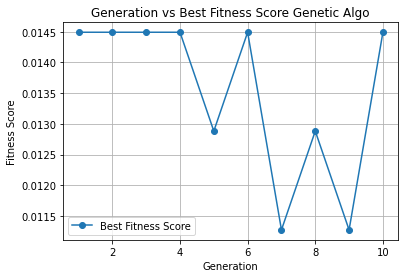

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(fitness_scores) + 1), fitness_scores, marker='o', label='Best Fitness Score')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.title('Generation vs Best Fitness Score Genetic Algo')
plt.legend()
plt.grid(True)
plt.show()